Loading dataset

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [210]:
dataset=pd.read_csv("NIFTY50_all.csv")

In [150]:
print(dataset.head(3))
print(dataset.shape)

         Date      Symbol Series  Prev Close   Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ       440.0  770.0  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ       962.9  984.0   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ       893.9  909.0   914.75  841.0  887.0   

   Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.9  984.72  27294366  2.687719e+15     NaN           9859619.0   
1  893.9  941.38   4581338  4.312765e+14     NaN           1453278.0   
2  884.2  888.09   5124121  4.550658e+14     NaN           1069678.0   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
(235192, 15)


In [110]:
dataset.info()
print(dataset.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

We see that Trades, Deliverable Volume, %Deliverable have some null values which will need to be handled during pre-processing.

In [211]:
dataset=dataset.sort_values(by="Date")
dataset["Date"]=pd.to_datetime(dataset["Date"], format="%Y-%m-%d")
dataset.set_index("Date", inplace=True)
dataset["Date"]=dataset.index

In [159]:
# Print the unique symbols count
print("Unique Symbols Count: ",dataset['Symbol'].nunique())

Unique Symbols Count:  65


We can see that there are companies which have more than one symbol. Thus we need to change that to a single symbol.

In [212]:
# COnvert symbol KOTAKMAH to KOTAKBANK
dataset['Symbol']=dataset['Symbol'].replace('KOTAKMAH','KOTAKBANK')
dataset['Symbol']=dataset['Symbol'].replace('TELCO','TATAMOTORS')
dataset['Symbol']=dataset['Symbol'].replace('JSWSTL','JSWSTEEL')
dataset['Symbol']=dataset['Symbol'].replace('TISCO','TATASTEEL')
dataset['Symbol']=dataset['Symbol'].replace('BHARTI','BHARTIARTL')
dataset['Symbol']=dataset['Symbol'].replace('ZEETELE','ZEEL')
dataset['Symbol']=dataset['Symbol'].replace('HINDLEVER','HINDUNILVR')
dataset['Symbol']=dataset['Symbol'].replace('UTIBANK','AXISBANK')
dataset['Symbol']=dataset['Symbol'].replace('HINDALC0','HINDALCO')
dataset['Symbol']=dataset['Symbol'].replace('INFOSYSTCH','INFY')
dataset['Symbol']=dataset['Symbol'].replace('HEROHONDA','HEROMOTOCO')
dataset['Symbol']=dataset['Symbol'].replace('SESAGOA','VEDL')
dataset['Symbol']=dataset['Symbol'].replace('SSLT','VEDL')
dataset['Symbol']=dataset['Symbol'].replace('MUNDRAPORT','ADANIPORTS')
dataset['Symbol']=dataset['Symbol'].replace('UNIPHOS','UPL')
dataset['Symbol']=dataset['Symbol'].replace('BAJAUTOFIN','BAJFINANCE')

We notice that the company with symbol INFRATEL has no record.

In [200]:
df = pd.read_csv("Stock Metadata.csv")
dataset = pd.merge(dataset, df, on='Symbol')

In [213]:
# Impute the missing values using bfill groupby Symbol
# dataset['Trades'] = dataset.groupby('Symbol')['Trades'].bfill()
# dataset['Deliverable Volume'] = dataset.groupby('Symbol')['Deliverable Volume'].bfill()
# dataset['%Deliverble'] = dataset.groupby('Symbol')['%Deliverble'].bfill()

#Interpolate the missing values using linear interpolation groupby Symbol
dataset['Trades'] = dataset.groupby('Symbol')['Trades'].transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
dataset['Deliverable Volume'] = dataset.groupby('Symbol')['Deliverable Volume'].transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
dataset['%Deliverble'] = dataset.groupby('Symbol')['%Deliverble'].transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
print(dataset.isna().sum())
dataset.info()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Date                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2000-01-03 to 2021-04-30
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Symbol              235192 non-null  object        
 1   Series              235192 non-null  object        
 2   Prev Close          235192 non-null  float64       
 3   Open                235192 non-null  float64       
 4   High                235192 non-null  float64       
 5   Low                 235192 non-null  float64       
 6   Last                235192 non-null  fl

In [202]:
dataset.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Prev Close,235192.0,1266.196349,0.0,274.3,566.5,1242.2,32861.95,2581.37032
Open,235192.0,1267.759708,8.5,275.0,567.025,1243.3125,33399.95,2585.259609
High,235192.0,1286.58144,9.75,279.5,576.9,1263.0,33480.0,2619.649216
Low,235192.0,1247.488465,8.5,269.6,556.5,1221.65,32468.1,2546.621396
Last,235192.0,1266.388302,9.1,274.4,567.0,1242.9,32849.0,2581.392543
Close,235192.0,1266.554351,9.15,274.35,566.7,1242.4,32861.95,2582.140942
VWAP,235192.0,1267.1323,9.21,274.6975,566.94,1242.6625,32975.24,2582.69998
Volume,235192.0,3045903.28603,3.0,219009.5,1010938.5,3019851.0,481058927.0,7333980.756792
Turnover,235192.0,161013844789483.3125,10470000.0,16128159588750.0,68326029390000.0,186383456571250.0,35643341676765004.0,329808537918688.9375
Trades,235192.0,45220.580015,11.0,13466.0,30570.5,58630.0,1643015.0,55122.945901


In [214]:
stocks_update_count=[]
opening_avg=[]
closing_avg=[]
prev_closing_avg=[]
high_avg=[]
low_avg=[]
last_avg=[]
volume_avg=[]
turnover_avg=[]
vwap_avg=[]

dates=dataset["Date"].unique()

for i in dates:
    day_dataset=dataset[dataset["Date"]==i]
    stocks_update_count.append(len(day_dataset))
    opening_avg.append(day_dataset["Open"].mean())
    closing_avg.append(day_dataset["Close"].mean())
    prev_closing_avg.append(day_dataset["Prev Close"].mean())
    high_avg.append(day_dataset["High"].mean())
    low_avg.append(day_dataset["Low"].mean())
    last_avg.append(day_dataset["Last"].mean())
    volume_avg.append(day_dataset["Volume"].mean())
    turnover_avg.append(day_dataset["Turnover"].mean())
    vwap_avg.append(day_dataset["VWAP"].mean())


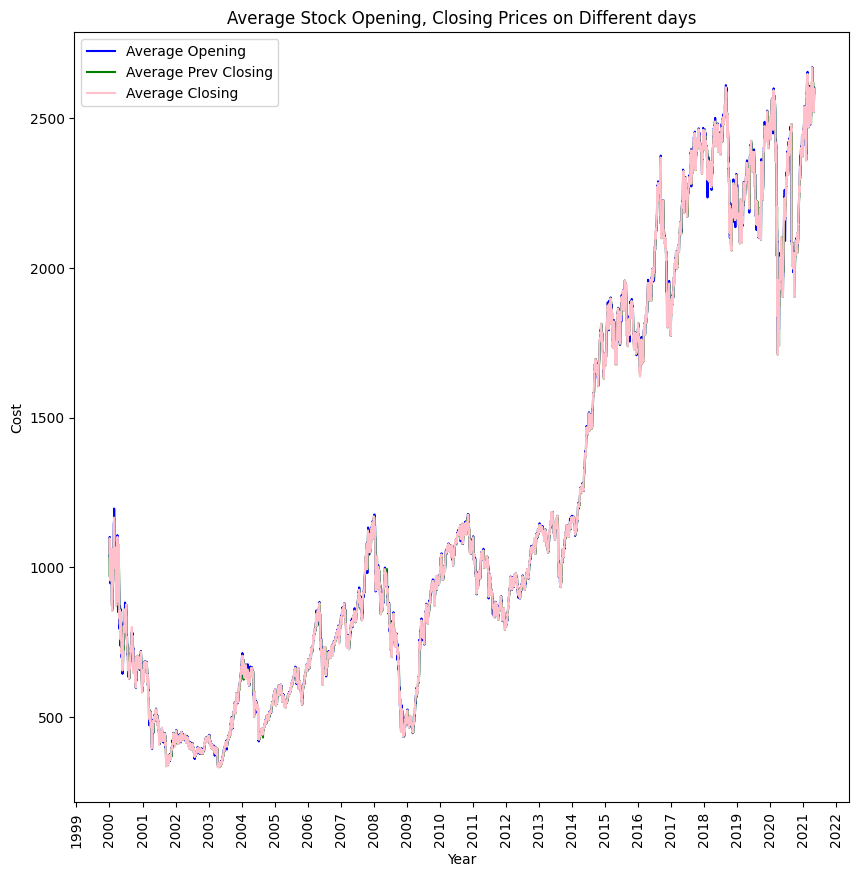

In [204]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,opening_avg,color="Blue",label="Average Opening")
plt.plot(dates,prev_closing_avg,color="Green",label="Average Prev Closing")
plt.plot(dates,closing_avg,color="Pink",label="Average Closing")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Opening, Closing Prices on Different days")
plt.xlabel("Year")
plt.ylabel("Cost")
plt.legend()
plt.show()

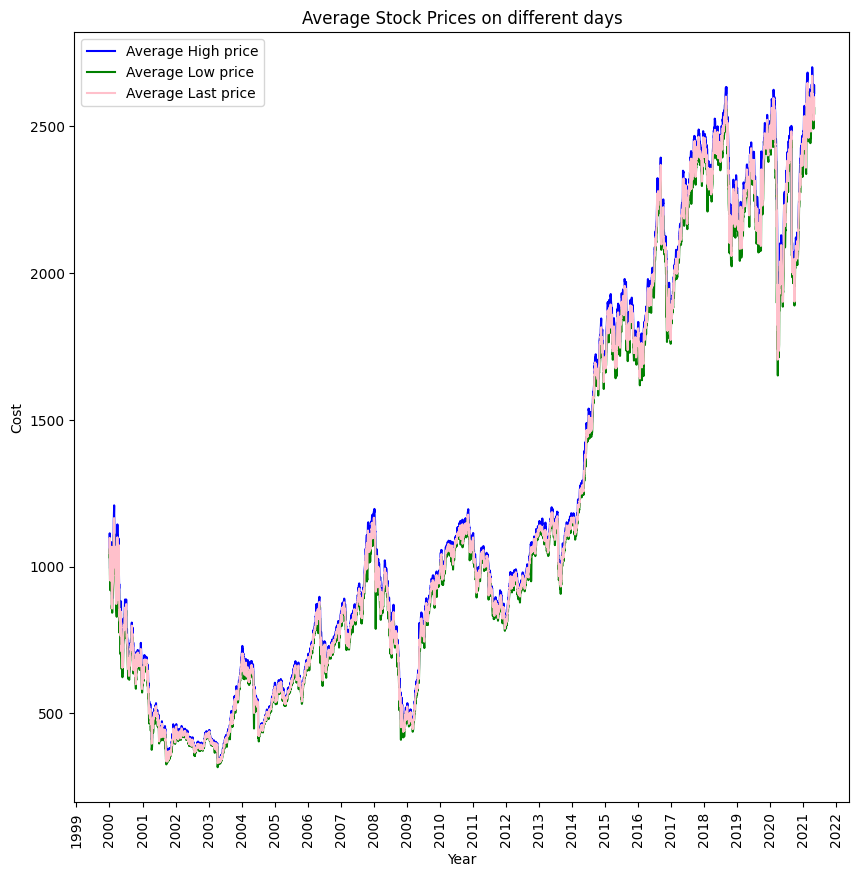

In [181]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,high_avg,color="Blue",label="Average High price")
plt.plot(dates,low_avg,color="Green",label="Average Low price")
plt.plot(dates,last_avg,color="Pink",label="Average Last price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Prices on different days")
plt.xlabel("Year")
plt.ylabel("Cost")
plt.legend()
plt.show()

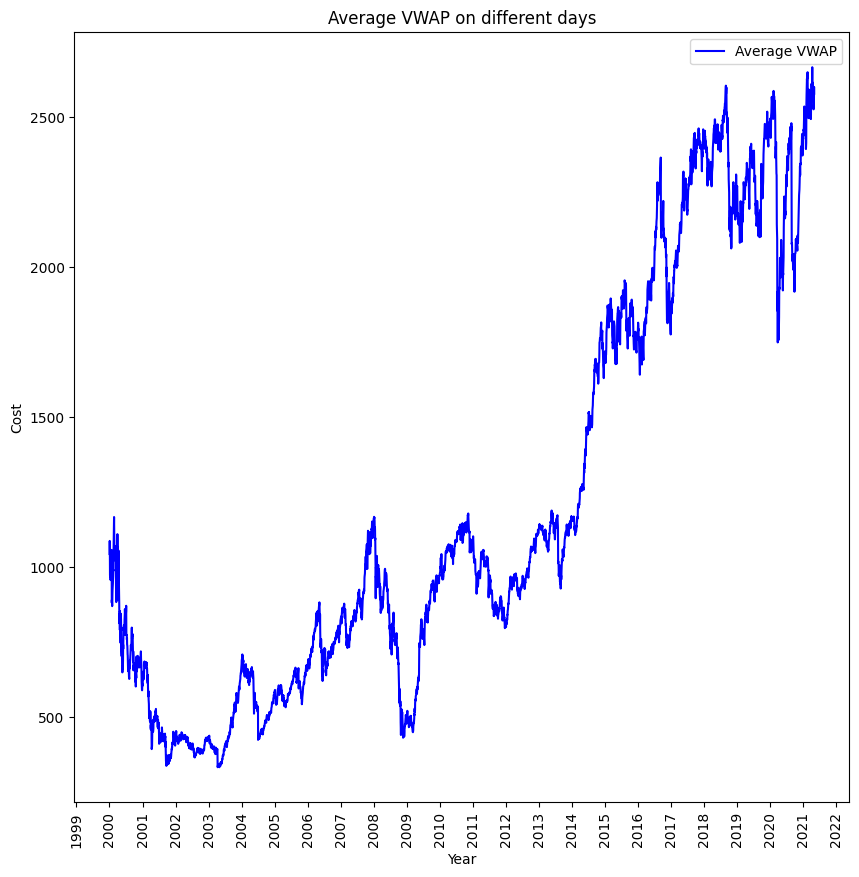

In [182]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,vwap_avg,color="Blue",label="Average VWAP")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average VWAP on different days")
plt.xlabel("Year")
plt.ylabel("Cost")
plt.legend()
plt.show()

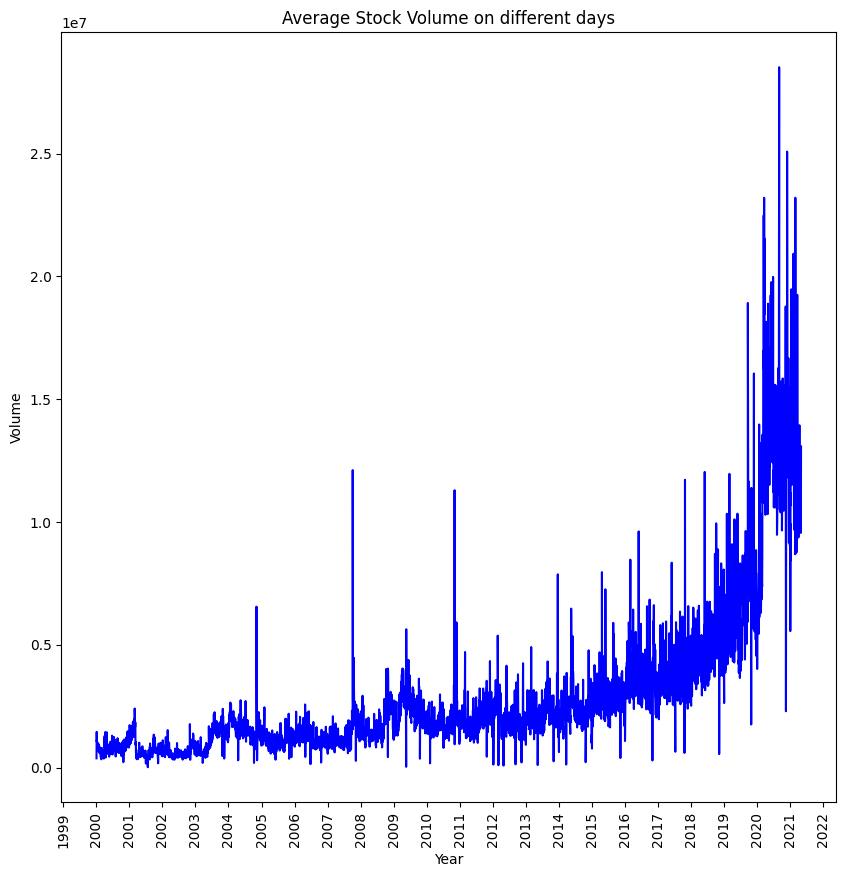

In [183]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,volume_avg,color="Blue",label="Average Volume")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Volume on different days")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

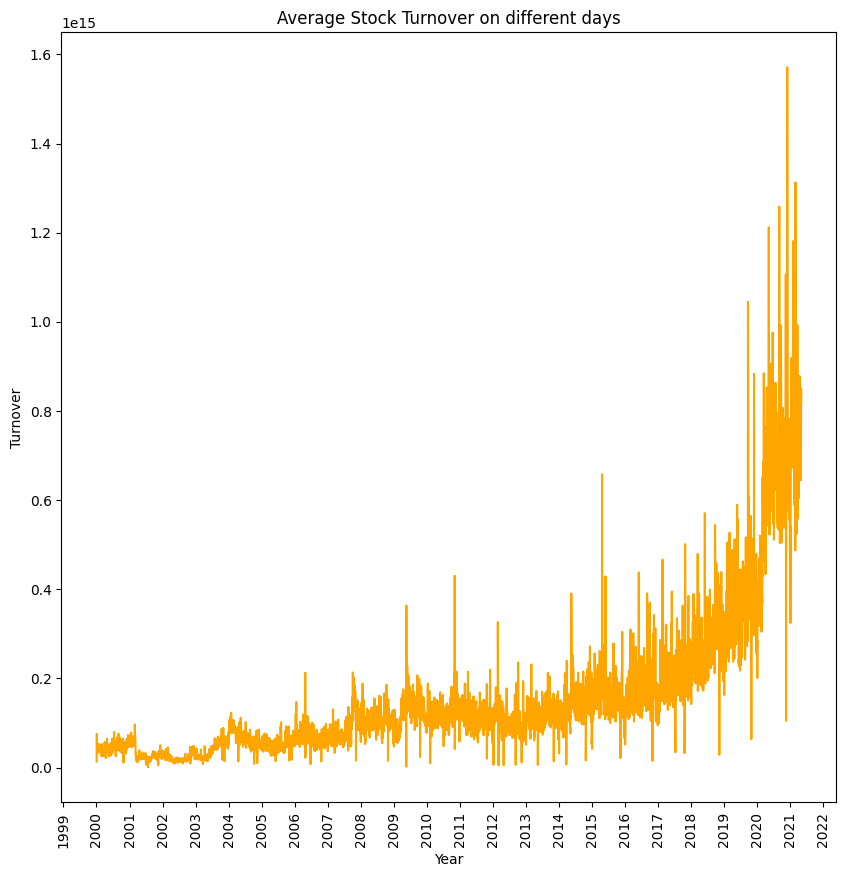

In [184]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,turnover_avg,color="Orange",label="Average Turnover")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Turnover on different days")
plt.xlabel("Year")
plt.ylabel("Turnover")
plt.show()

In [215]:
labels=[]
values=[]
labels2=[]
values2=[]

labels.extend(dataset["Prev Close"])
values.extend(["Prev Close"]*len(dataset["Prev Close"]))

labels.extend(dataset["Open"])
values.extend(["Open"]*len(dataset["Open"]))

labels.extend(dataset["High"])
values.extend(["High"]*len(dataset["High"]))

labels.extend(dataset["Low"])
values.extend(["Low"]*len(dataset["Low"]))

labels.extend(dataset["Last"])
values.extend(["Last"]*len(dataset["Last"]))

labels.extend(dataset["Close"])
values.extend(["Close"]*len(dataset["Close"]))

labels.extend(dataset["VWAP"])
values.extend(["VWAP"]*len(dataset["VWAP"]))

labels.extend(dataset["Volume"])
values.extend(["Volume"]*len(dataset["Volume"]))

labels2.extend(dataset["Turnover"])
values2.extend(["Turnover"]*len(dataset["Turnover"]))

labels.extend(dataset["Trades"])
values.extend(["Trades"]*len(dataset["Trades"]))

labels.extend(dataset["Deliverable Volume"])
values.extend(["Deliverable Volume"]*len(dataset["Deliverable Volume"]))

labels.extend(dataset["%Deliverble"])
values.extend(["%Deliverble"]*len(dataset["%Deliverble"]))

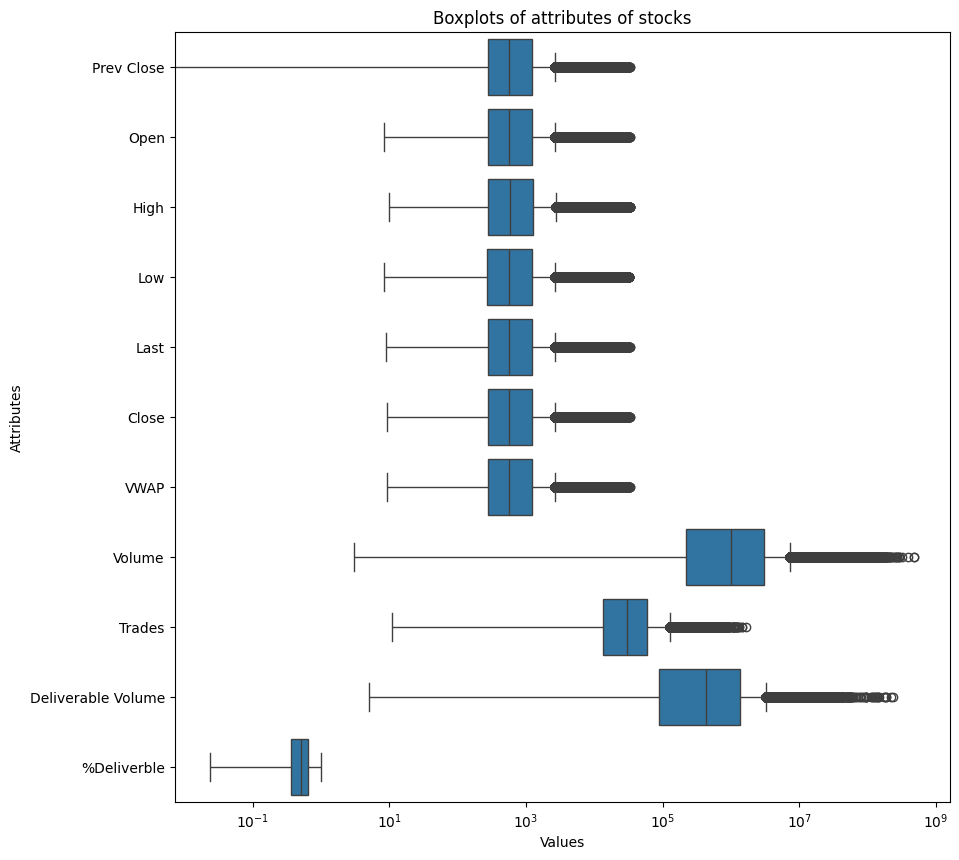

In [186]:
data={"label":labels,"values":values}
data_df=pd.DataFrame(data)
plt.figure(figsize=(10,10))
sns.boxplot(x='label',y='values',data=data_df)
plt.title('Boxplots of attributes of stocks')
plt.xlabel('Values')
plt.xscale('log')
plt.ylabel('Attributes')
plt.show()

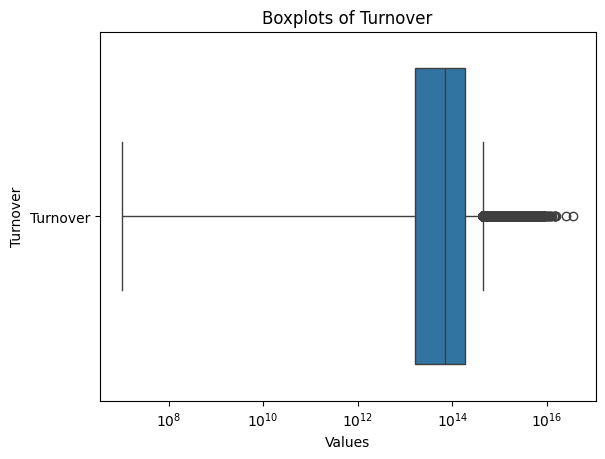

In [187]:
data={"label":labels2,"values":values2}
data_df=pd.DataFrame(data)
sns.boxplot(x='label',y='values',data=data_df)
plt.title('Boxplots of Turnover')
plt.xlabel('Values')
plt.xscale('log')
plt.ylabel('Turnover')
plt.show()

Clearly visible from above boxplots that we have a lot of extreme outliers. The outliers are even apart in magnitudes if powers of 10 than the inter-quartile range!!

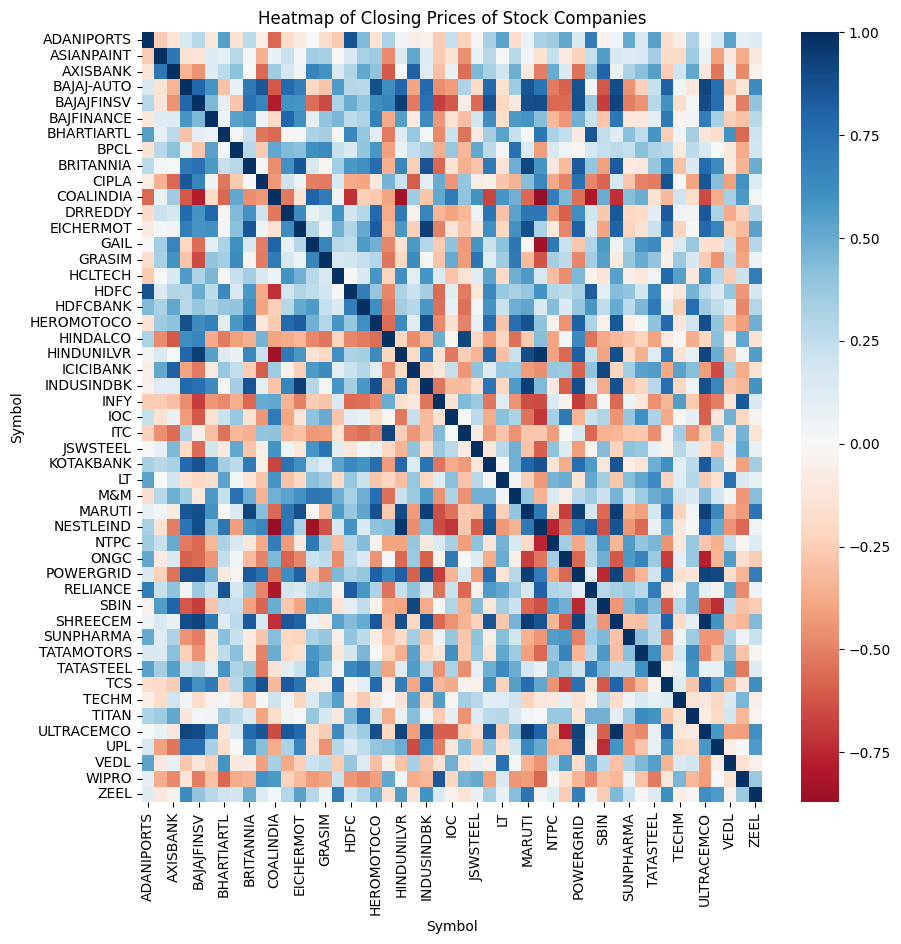

In [188]:
closing_prices = dataset.pivot(index='Date', columns='Symbol', values='Close')
correlation_matrix = closing_prices.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="RdBu", center=0)
plt.title("Heatmap of Closing Prices of Stock Companies")
plt.show()

We Observe that the heatmap has lots of blue and red shades, showing that there is lots of positive or negative correlation between stocks of different companies.

Graph of moving Average for 20 days, 50 days

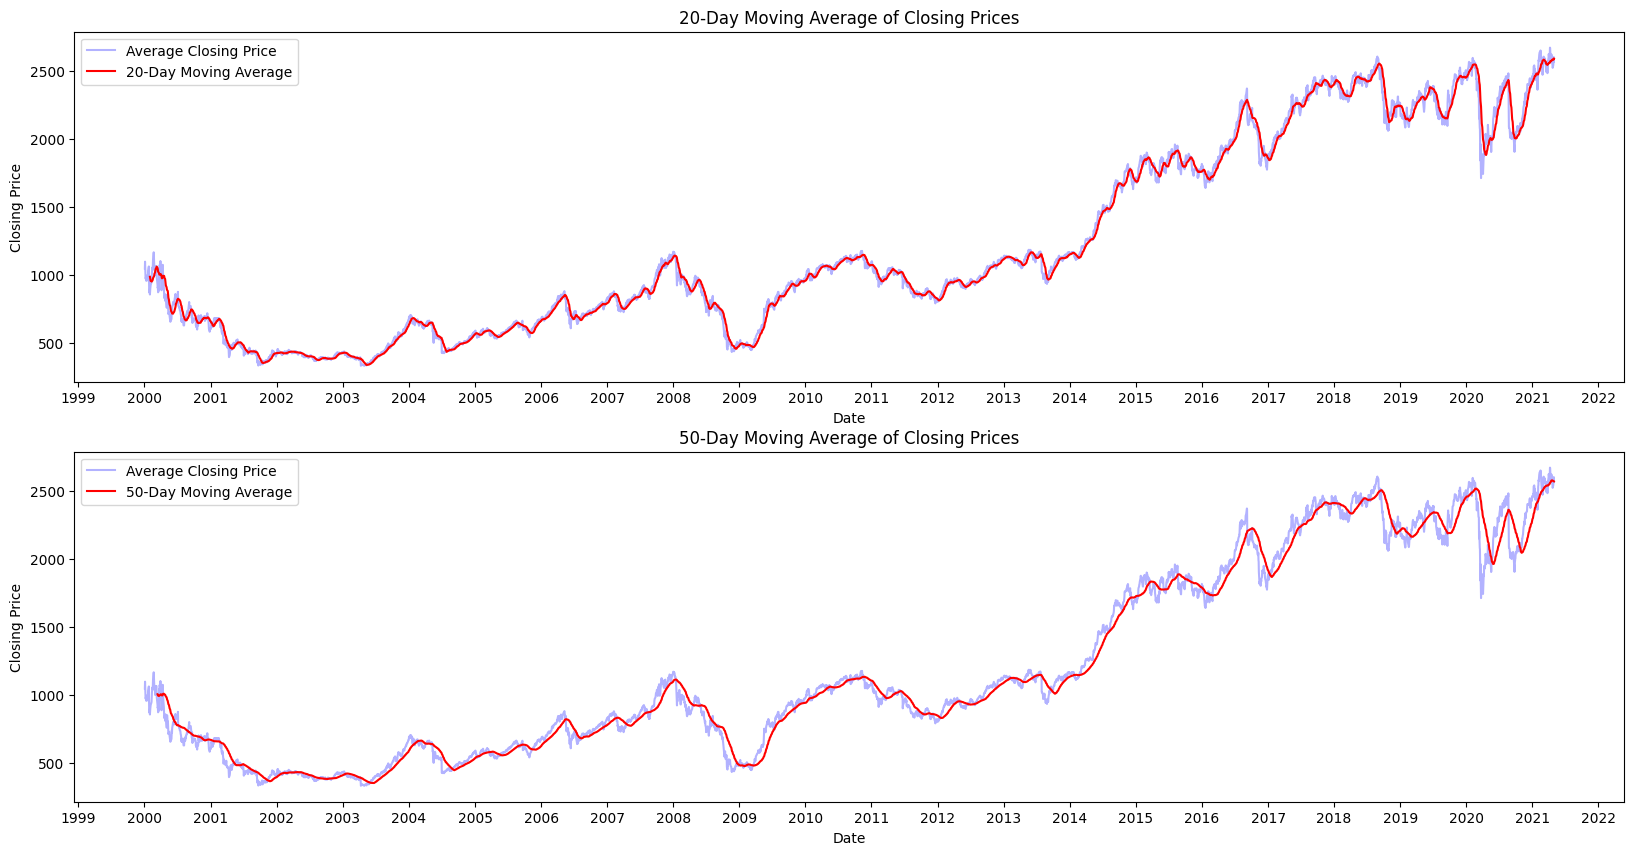

In [189]:
import matplotlib.dates as mdates

closing_avg_pd=pd.Series(closing_avg)
moving_avg_20=closing_avg_pd.rolling(window=20).mean()
moving_avg_50=closing_avg_pd.rolling(window=50).mean()

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(dates,closing_avg,label="Average Closing Price",color="blue",alpha=0.3)
plt.plot(dates,moving_avg_20,label="20-Day Moving Average",color="red")
plt.title("20-Day Moving Average of Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()

plt.subplot(2,1,2)
plt.plot(dates,closing_avg,label="Average Closing Price",color="blue",alpha=0.3)
plt.plot(dates,moving_avg_50,label="50-Day Moving Average",color="red")
plt.title("50-Day Moving Average of Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()

plt.show()

In [190]:
dataset['Returns'] = dataset.groupby('Symbol')['Close'].pct_change()
# Calculate the 20-day moving average of the closing prices
dataset['MA20'] = dataset.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=20).mean())
dataset['Volatility'] = dataset.groupby('Symbol')['Returns'].transform(lambda x: x.rolling(window=20).std()) * 100

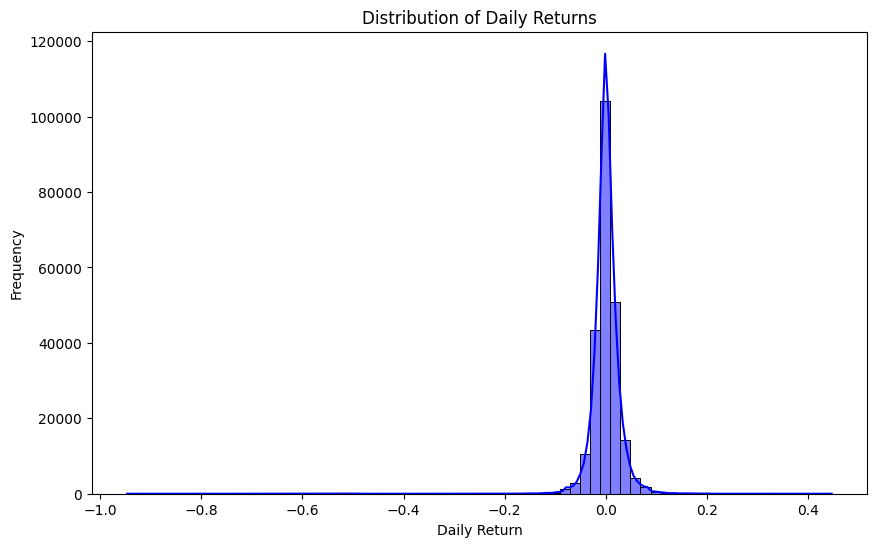

In [191]:
# Plot Histogram of Daily Returns
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Returns'].dropna(), bins=70, color='blue', edgecolor='black', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
correlation_matrix=dataset[["Prev Close","Open","High","Low","Last","Close","VWAP","Volume","Turnover","Trades","Deliverable Volume","%Deliverble"]].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu")
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

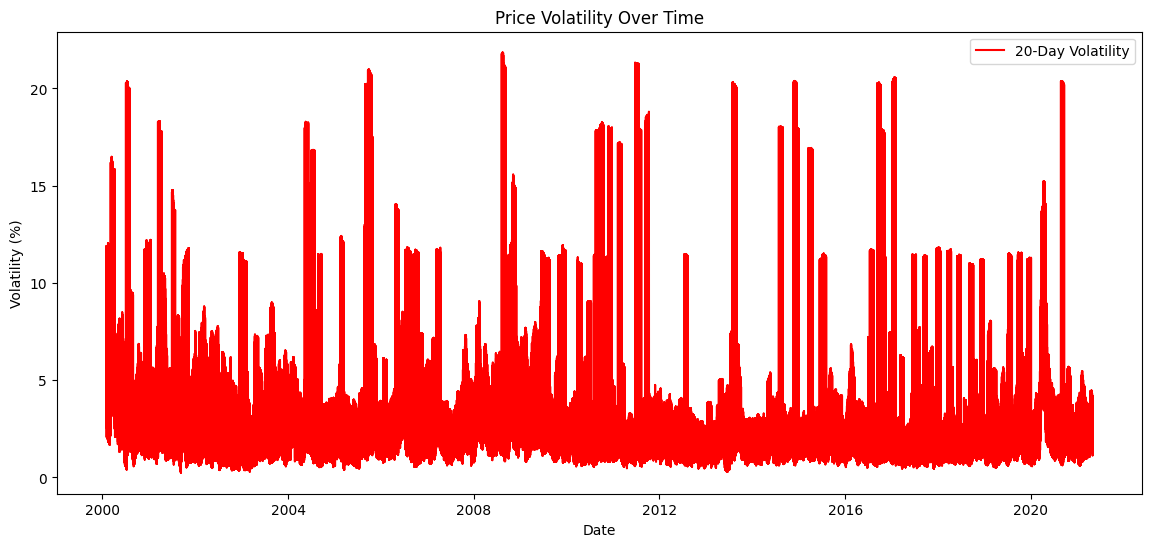

In [192]:
plt.figure(figsize=(14, 6))
plt.plot(dataset['Date'], dataset['Volatility'], color='red', label='20-Day Volatility')
plt.title('Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

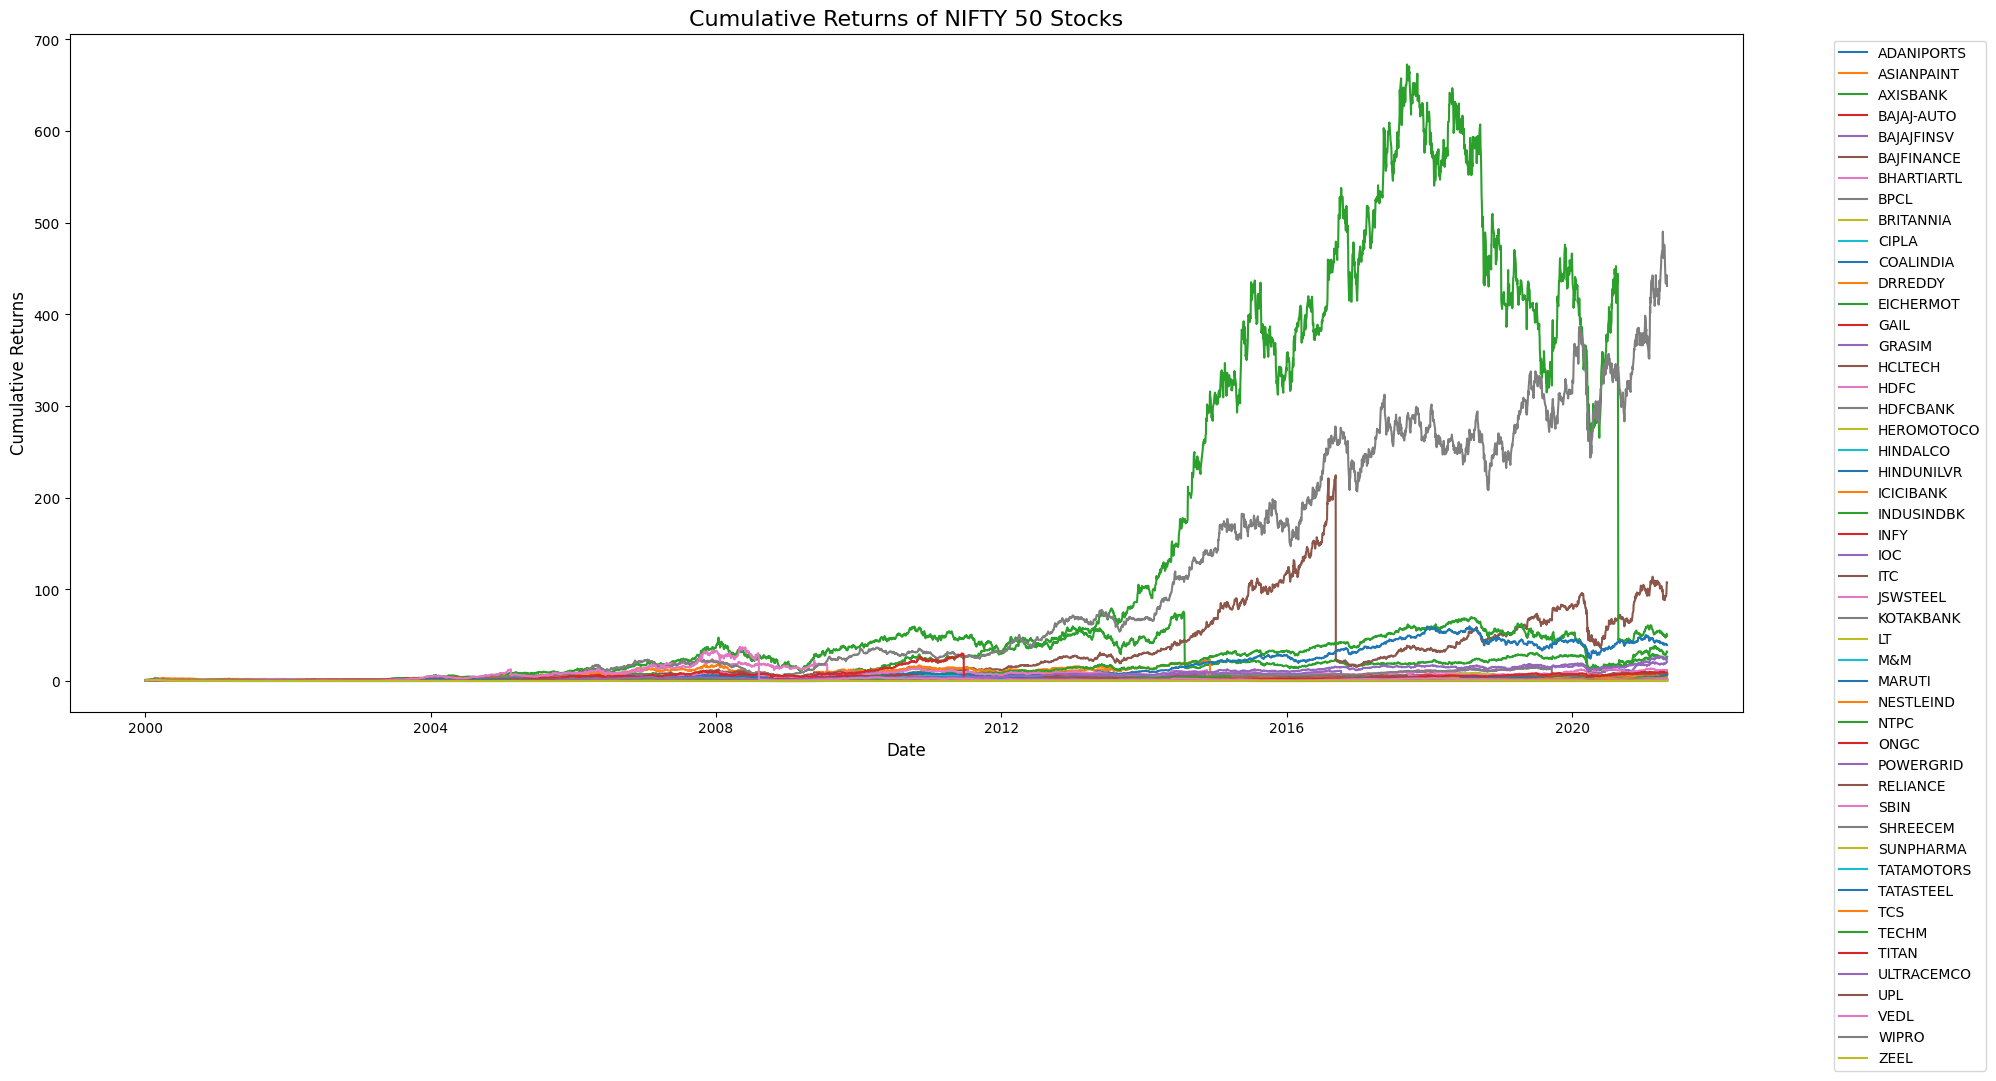

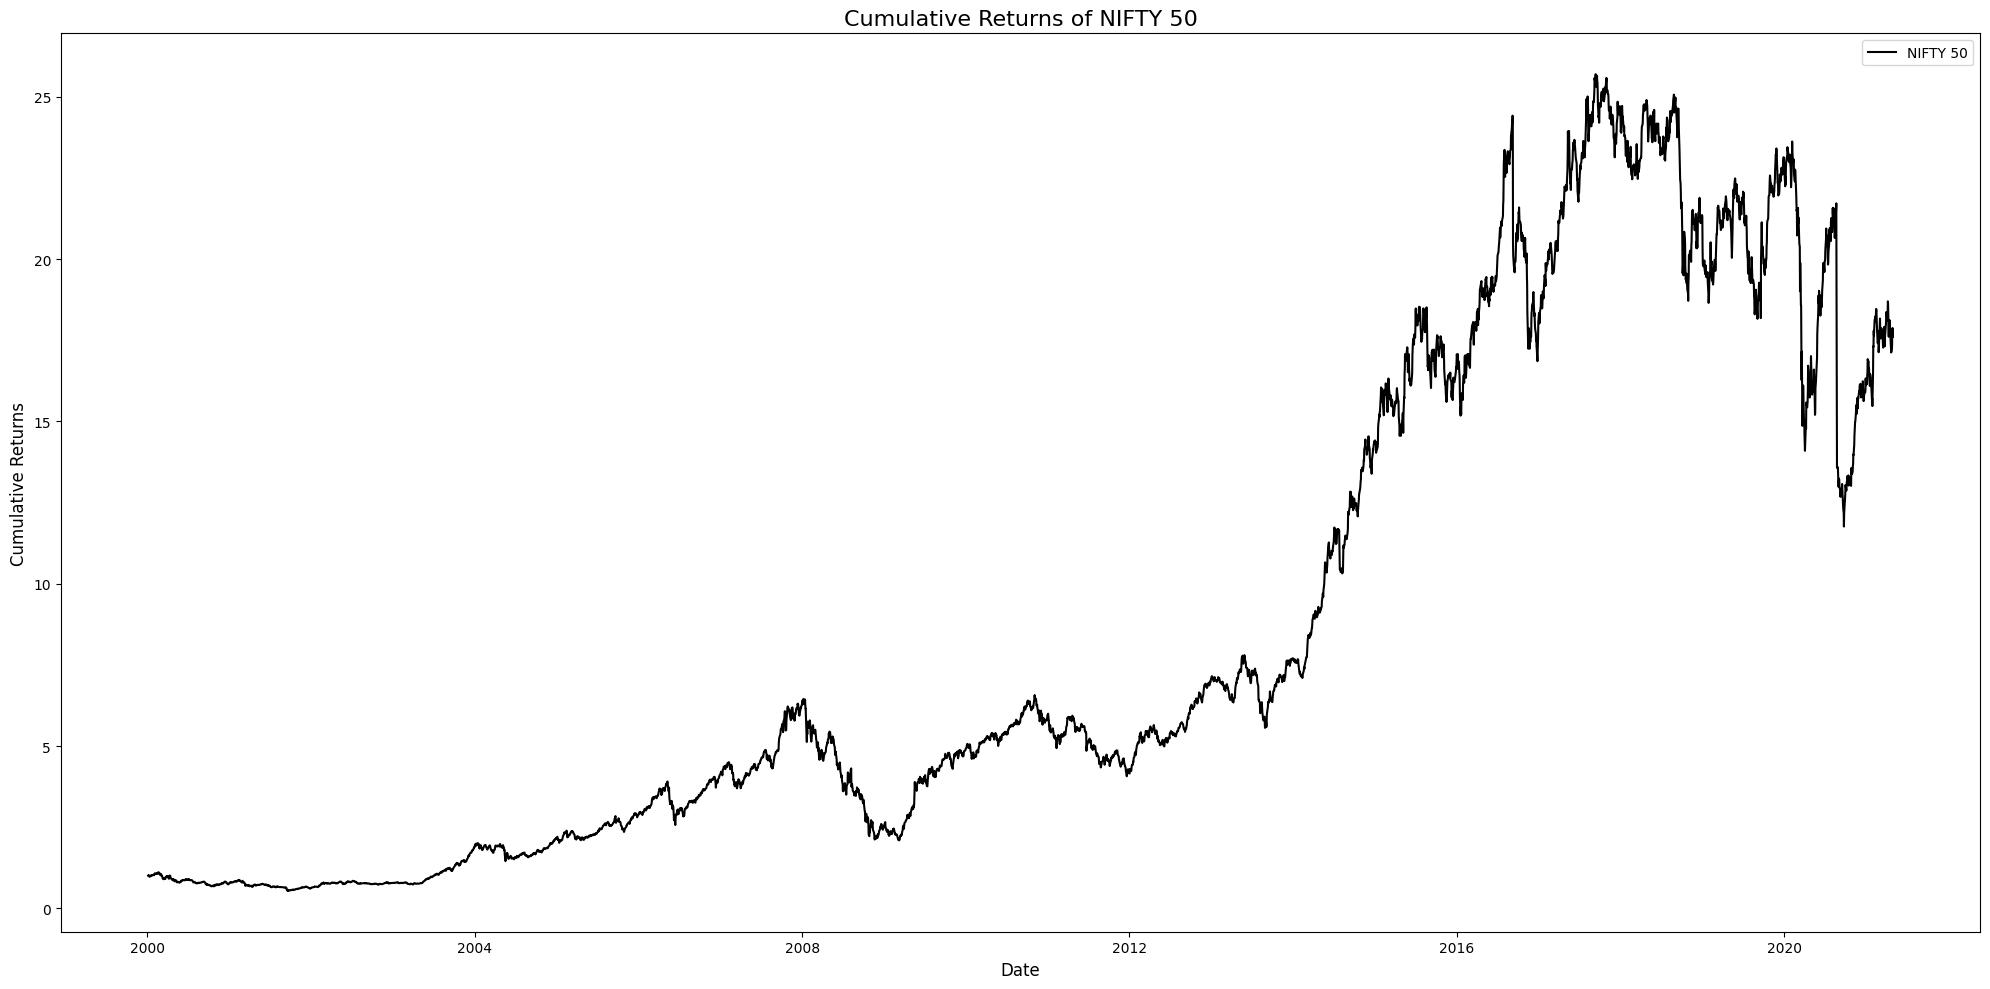

In [193]:
# Plot cumulative returns of each stock
returns_df = dataset.pivot(index='Date', columns='Symbol', values='Returns')
cumulative_returns = (1 + returns_df).cumprod()

plt.figure(figsize=(20, 10))

for column in cumulative_returns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)


plt.title('Cumulative Returns of NIFTY 50 Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plot the cumulative returns of all stocks
cumulative_returns['NIFTY 50'] = cumulative_returns.mean(axis=1)
plt.figure(figsize=(20, 10))
plt.plot(cumulative_returns.index, cumulative_returns['NIFTY 50'], label='NIFTY 50', color='black')
plt.title('Cumulative Returns of NIFTY 50', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


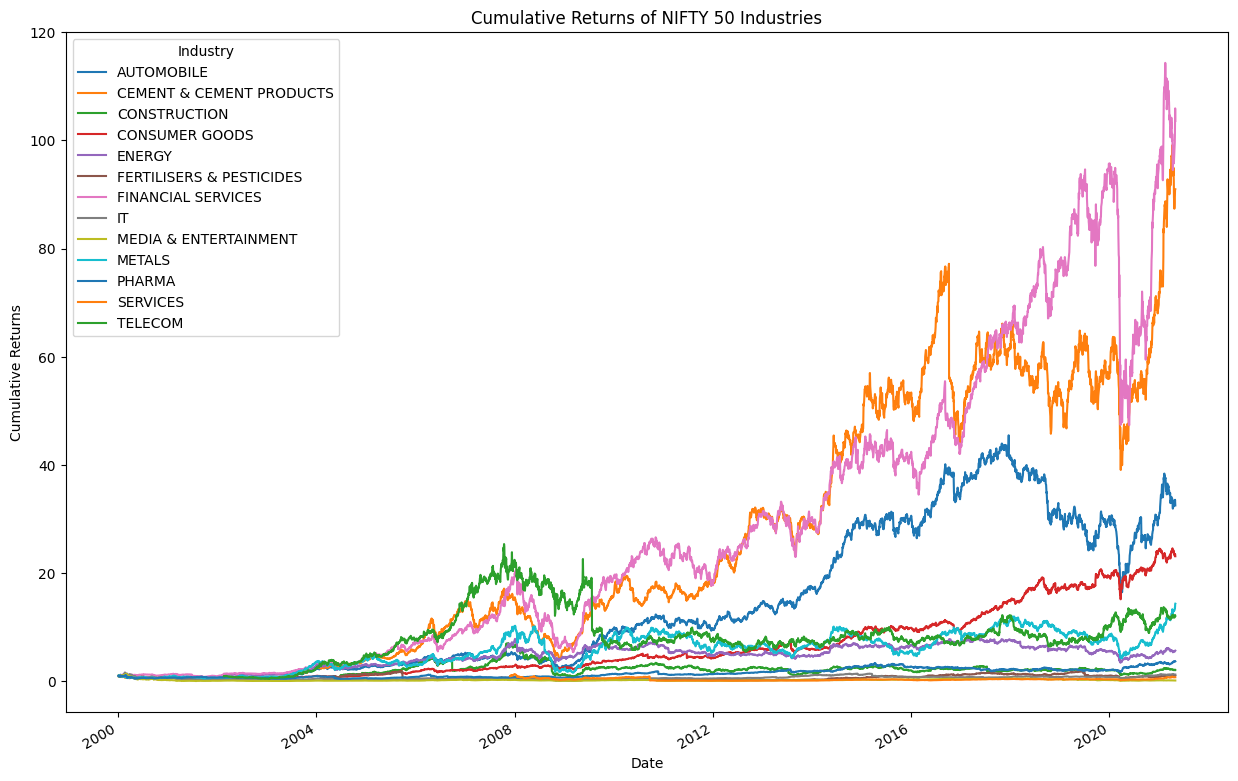

In [194]:
# Industry performance analysis
# Plot cumulative returns of each industry
industry_returns = dataset.pivot_table(index='Date', columns='Industry', values='Returns', aggfunc='mean')
industry_cumulative_returns = (1 + industry_returns).cumprod()
industry_cumulative_returns.plot(figsize=(15,10))
plt.title('Cumulative Returns of NIFTY 50 Industries')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(title='Industry')
plt.show()


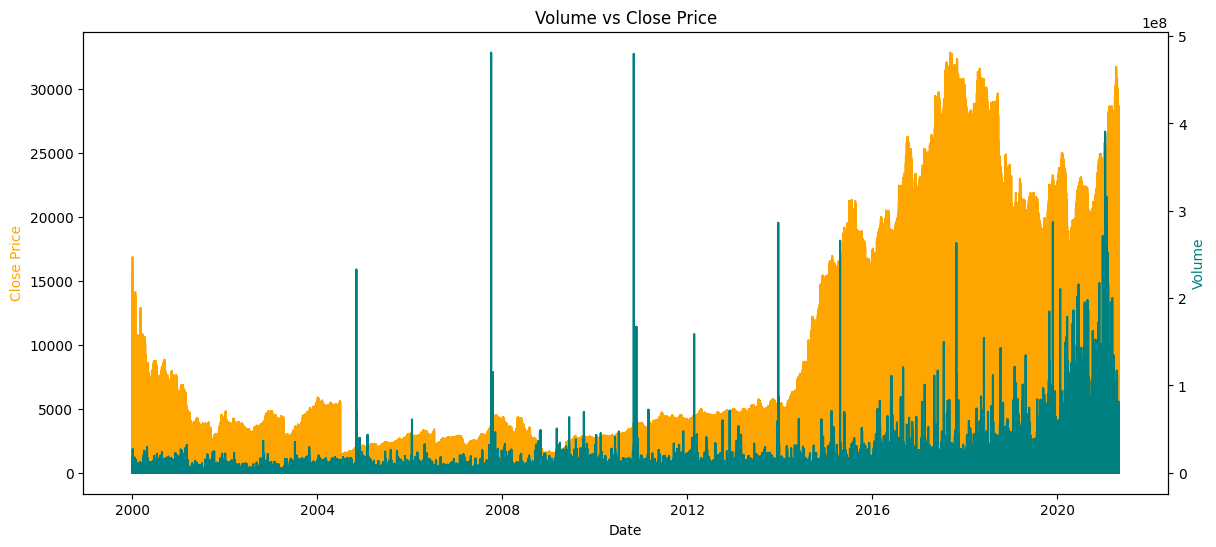

In [195]:
# Plot Close Price vs Existing VWAP
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(dataset['Date'], dataset['Close'], color='orange', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='orange')

ax2 = ax1.twinx()
ax2.plot(dataset['Date'], dataset['Volume'], color='teal', label='Volume')
ax2.set_ylabel('Volume', color='teal')
plt.title('Volume vs Close Price')
plt.show()

/var/folders/js/9t13d2qj31d0c409q4bntv3h0000gn/T/ipykernel_30248/4018154558.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = dataset['Close'].resample('M').mean()


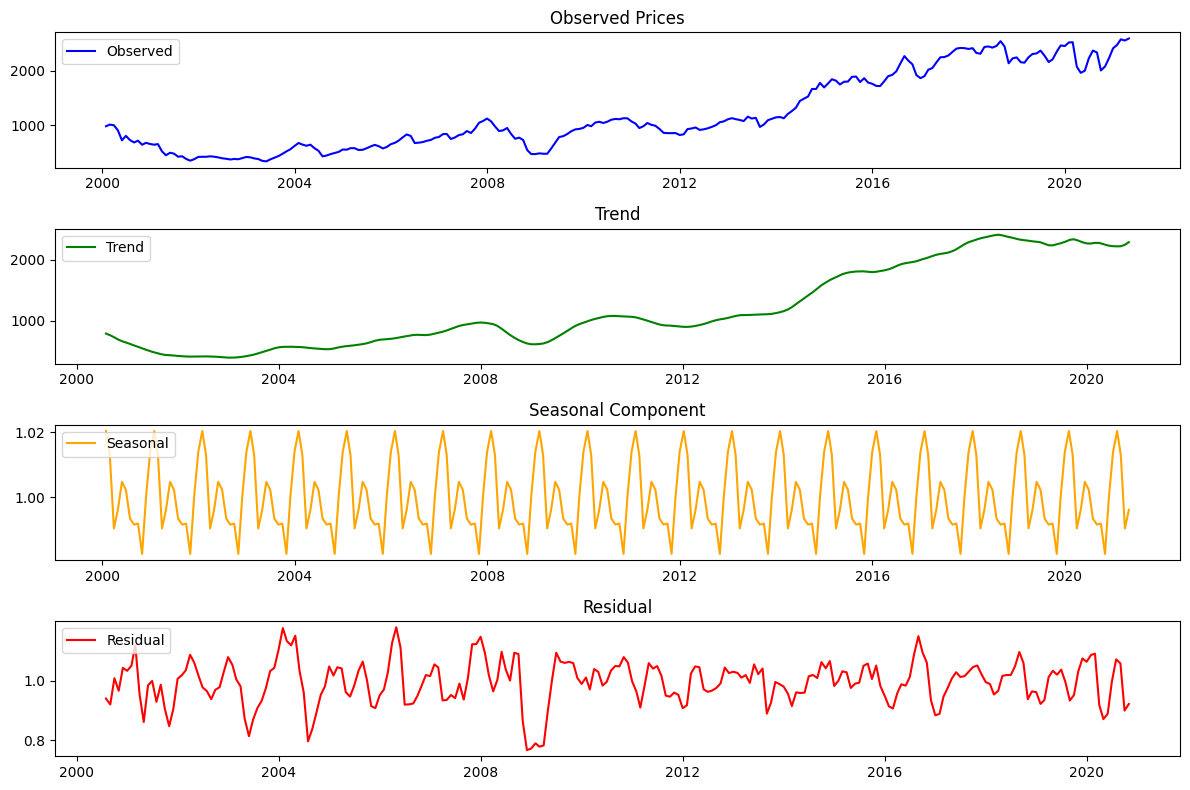

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Date' as the index
dataset.set_index('Date', inplace=True)

# Resample to monthly data to capture broader seasonal trends
df_monthly = dataset['Close'].resample('M').mean()

# Apply seasonal decomposition
# Choose 'multiplicative' if you observe that the variance grows with the mean
decomposition = seasonal_decompose(df_monthly, model='multiplicative', period=12)

# Plot decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.title('Observed Prices')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual')

plt.tight_layout()
plt.show()